In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import torch
from fastai.vision import *
from fastai.metrics import *

torch.cuda.manual_seed_all(7)

In [2]:
transforms = get_transforms(max_zoom=2.0, max_warp=0.5)

In [3]:
# Batches of 32
databunch = ImageDataBunch.from_csv(Path('images'), ds_tfms=transforms,
                                csv_labels='train.csv',
                                valid_pct=0.0,
                                size=(140,210), bs=32).normalize(imagenet_stats)

In [4]:
# Add the test images to the DataBunch
test_df = pd.read_csv('test_ApKoW4T.csv')
test_img = ImageList.from_df(test_df, path='/home/jupyter/analytics_vidhya',
                             folder='test')
databunch.add_test(test_img)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


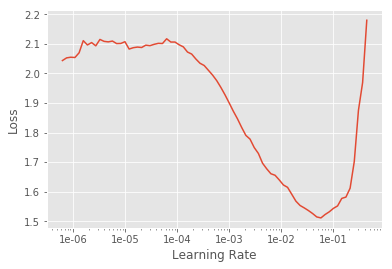

In [8]:
learner = cnn_learner(databunch, models.resnet50, metrics=accuracy)
learner.lr_find();
learner.recorder.plot()

In [15]:
del learner;
gc.collect()

10552

In [9]:
learner.fit_one_cycle(5, max_lr=slice(1e-04, 1e-02))

In [10]:
pred_labels = []

for i in range(len(learner.data.test_ds)):
    temp_pred = str(learner.predict(learner.data.test_ds[i][0])[0])
    pred_labels.append(temp_pred)

In [11]:
import time
ts = time.time()

submission = pd.read_csv('Submission.csv')
submission['category'] = pred_labels

file_name = 'submission_{}.csv'.format(ts)
submission.to_csv('Submission_Files/'+file_name, index=False)

In [12]:
learner.save('stage-3-full-rn50')

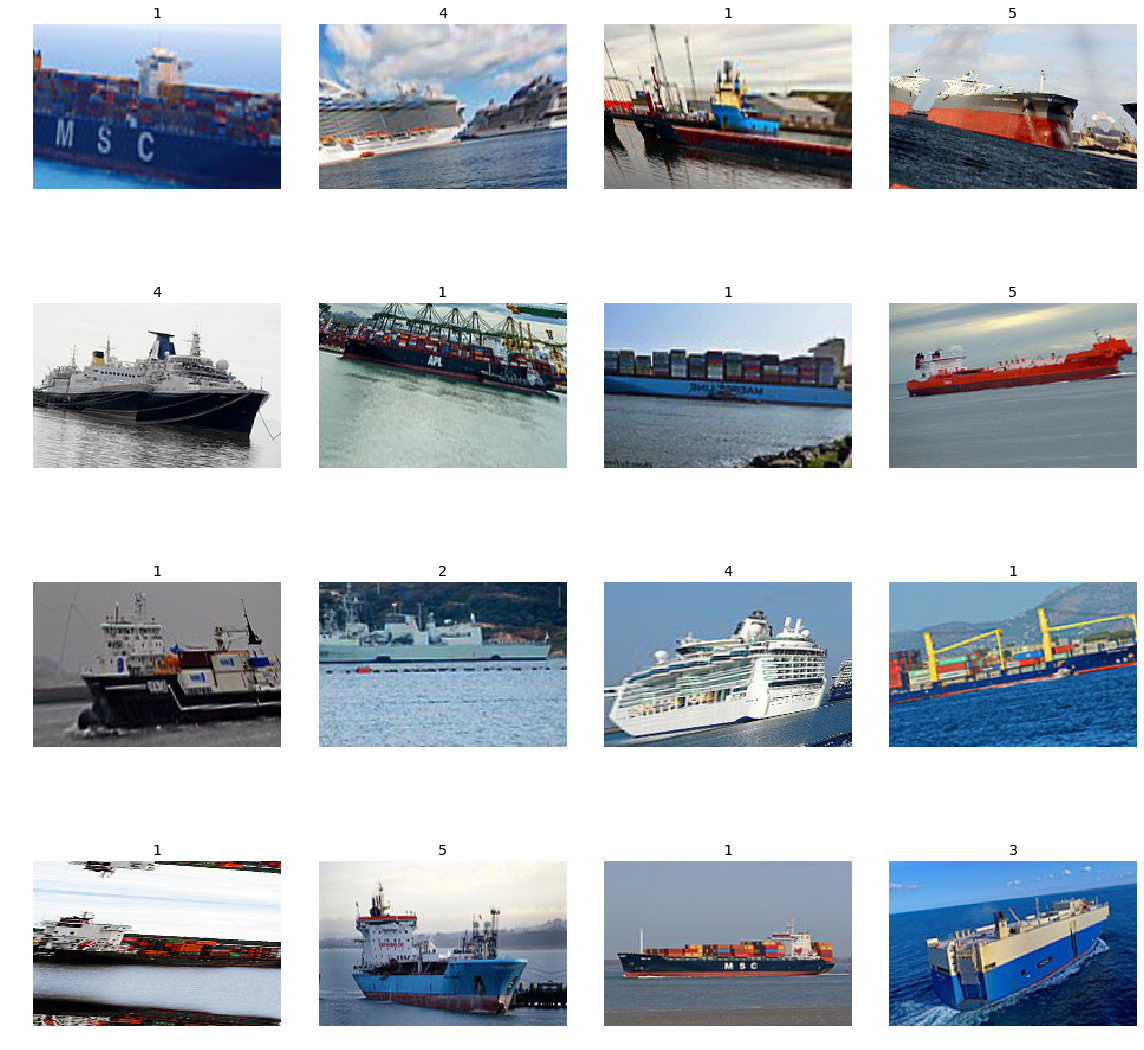

In [22]:
databunch.show_batch(rows=4)